In [15]:
#i have some things messed up in my system so had to include some folders to sys path skip this if jupyter works
#normally on your system
import os
os.sys.path.insert(0,'/home/tushar55/.virtualenvs/cv/lib/python3.6/site-packages')

In [29]:
import numpy as  np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
%matplotlib inline

In [324]:
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
dataset = "gaussian_quantiles"
#dataset = "blobs"
#dataset = "noisy_circles"


X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
#plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [325]:
shape_X = X.shape
shape_Y = Y.shape
m = shape_Y[1]
print('shapes are of X1 y and m are ', shape_X,shape_Y,m)

shapes are of X1 y and m are  (2, 200) (1, 200) 200


/home/tushar55/.virtualenvs/cv/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


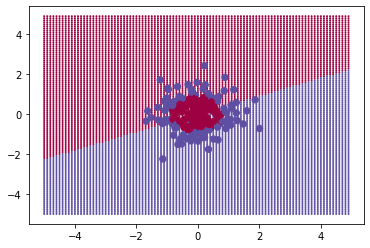

In [326]:
#any other idea to plot the data is welcomed

#training a logistic regression model to see its prediction
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T,Y.T)

#array of the whole mesh
xx, yy = np.meshgrid(np.arange(-5,5, 0.1),
                     np.arange(-5, 5, 0.1))

z = np.c_[xx.ravel(), yy.ravel()].T

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(z[0,:],z[1,:],c = Z,s = 1, cmap = plt.cm.Spectral)
plt.scatter(X[0, :],X[1, :], c = Y, s = 40, cmap = plt.cm.Spectral)

In [327]:
#WE Will be making a neural net with one hidden layers having 4 weights
#Step 1: Layers Sizes
#step 2 : def Parameters
#step 3 : def forward Prop
#step 4 : compute cost
# step 5 : backward props
#step 6 : calculate grads
#step 7 : update parmas

In [328]:
def layer_sizes(X,Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    n_h = 4
    return (n_x, n_h, n_y)

In [329]:
def initialize_parameters(n_x,n_h,n_y):
    
    W1 = np.random.randn(n_h,n_x) * 0.01
    W2 = np.random.randn(n_y,n_h) * 0.01
    b1 = np.zeros((n_h,1))
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [330]:
def sigmoid(Z):
    s = 1/(1 + np.exp(-Z))
    return s

In [331]:
def forward_propagation(X,parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    
    return A2, cache

In [332]:
def compute_cost(Y,A2,parameters):
    m = Y.shape[1]
    temp = np.dot(Y,np.log(A2).T) + np.dot((1 - Y), np.log(1 - A2).T)
    cost = -1/m * (temp)
    cost = float(np.squeeze(cost))
    return cost

In [333]:
def backward_propagation(cache,parameters,X,Y):
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']

  ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2,A1.T)
    db2 = 1/m * np.sum(dZ2,axis = 1,keepdims = True)
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = 1/m * np.dot(dZ1,X.T)
    db1 = 1/m * np.sum(dZ1,axis = 1,keepdims = True)
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [334]:
def update_parameters(grads,parameters,learning_rate = 1.2):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [335]:
def nn_model(X,Y,num_iterations = 10000, print = False):
    
    np.random.seed(3)
    #step 1 : def layerSizes
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x,4,n_y)
    
    for i in range(num_iterations):
        #step3 : forward_prop
        A2,cache = forward_propagation(X,parameters)

        #step 4 : compute the cost
        cost = compute_cost(Y,A2,parameters)
        
        #step 5 : back prop
        grads = backward_propagation(cache,parameters,X,Y)
        
        #step 6 : update parameters
        parameters = update_parameters(grads,parameters)
    
    return parameters

In [336]:
def predict(parameters,X):
    A2,cache = forward_propagation(X,parameters)
    predictions = A2 > 0.5
    return predictions

In [337]:
import sklearn.linear_model

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.05
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    z = np.c_[xx.ravel(), yy.ravel()].T
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    # Plot the contour and training examples
    plt.scatter(z[0,:],z[1,:], c = Z, s = 1, cmap = plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y,s =40, cmap=plt.cm.Spectral)
    
def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

/home/tushar55/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


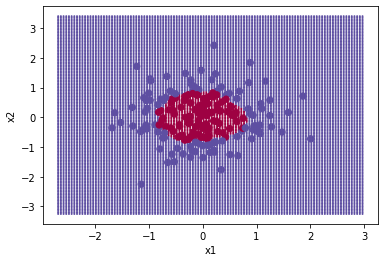

In [338]:
#Finally building the whole model and running the tests
parameters = nn_model(X,Y,num_iterations = 25000,print = False)
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)